# DAT565 Assignment 7 - Group 43

- Student 1 - Luca Modica - (5 hours)
- Student 2 - Hugo Alves Henriques E Silva - (5 hours)
- Student 3 - YenPo Lin - (5 hours)

October 12, 2023

## Introduction

This assignment will work with the [MNIST data set](http://yann.lecun.com/exdb/mnist/). The MNIST dataset is a standard benchmark
where small 28x28 pixel grayscale images of handwritten digits. For each image, the US Census
Bureau  manually  assigned  a  class  label,  an  integer  from  0  to  9.  The  task  associated  with  the
dataset is **building a model that takes a new image (of the same size) and returns a class label
– that is, an integer from 0 to 9.**

For  this  assignment,  we will  use  the  [Keras  framework](https://keras.io/)  to  construct  our  neural  networks. Moreover, It's divided in 3 different parts:

1. **setting-up, ataset load and preprocessing**
2. **neural network training**
3. **convolutional neural network**.

## Importing the libraries

In [ ]:
# package for advanced debugging in python in a simple way
%%capture
!pip install icecream

In [ ]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from icecream import ic

# config inline plots
%matplotlib inline
# set seaborn style
sns.set_style('darkgrid')

## Part 1: setting-up, dataset loading and preprocessing

Following the provided notebook, in the first part there will all the operation in preparation for the neural network training. In particular:

- setting the the first hyper-parameter and default values (`batch size`, `number of classes` related to the hadnwritten number recognition task and the `number of training epochs`);
- MNIST dataset loading;
- dataset preprocessing.

In [ ]:
# @title Hyper-parameters and default variable initialization

batch_size = 128
num_classes = 10
epochs = 10

In [ ]:
# @title Data loading

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [ ]:
# @title Data preprogcessing

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(lbl_train, num_classes)
y_test = np_utils.to_categorical(lbl_test, num_classes)

#### 1.1: Explain the data pre-processing highlighted in the notebook

In the preprocessing cell above, 2 preprocessing operations were done in order to prepare the dataset for the neural network training.

1. The image RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general we should seek to make your input values small, for both reach better performace and faster convergence. For this purpose, we normalize the RGB pixel values values in a range of $[0, 1]$.
```python
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
```

2. After normalizing the train set RGB values of the images, the next preprocessing step was to encoding the target labels of our task: that is, all the possible digits from $0$ to $9$. The task was accomplished using one-hot encoding, so representing each possible label with a binary value.
```python
y_train = np_utils.to_categorical(lbl_train, num_classes)
y_test = np_utils.to_categorical(lbl_test, num_classes)
```
The main reason of using this kind of categorical encoding is the lack of relations between the dataset labels (for example, an importance order between the digits).

---

## Part 2: neural network training

In [ ]:
## Define model ##
model = Sequential()

model.add(Flatten()) # Flatten() Flattens the input. Does not affect the batch size.
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

#### 2.1 How  many  layers  does  the  network  in  the  notebook  have?  How  many  neurons  does each layer have? What activation functions and why are these appropriate for this application? What is the total number of parameters for the network? Why do the input and output layers have the dimensions they have?

The neural network has an input layer with the same dimension as the number of feature we have for each datapoint. In the the MNIST dataset case, the features corresponds to the number of pixels in an image; so the input layer has $28 \times 28 = 784$ neurons.

Then, the architecture of the given model is formed by 3 layers:

- The first 2 layers are hidden layers, with 64 neurons each. The number of neurons in thise case are usally decided based on the neural network adjustment in order to improve its performace. But in general, It should be less than the the number in the input layer. In both the hidden layers the activation function used is the ReLU. ReLU is flat only for negative values, instead of also for high numbers; this feature can help making the gradient descent algorithm faster, since there will be less places where the function will be flat (thus, less places where the learning is slowed down).
- The last one is the output layers. It has 10 neurons, one for each possible digit in the MNIST dataset. Since we have 10 different choices, we can also represent the output layer with just 4 neurons; the number, in that case, would be represented by its binary representation (we could use 4 neurons for numbers from 0 to 12). Since It's a multi-class classification problem, the softmax activation function is used. It's a generaliztion of the logistic function, suitable for more than 2 classes.

#### 2.2 What loss function is used to train the network? What is the functional form (a mathematical expression) of the loss function? and how should we interpret it? Why is it appropriate for the problem at hand?

The loss function used to train the neural network is the **categorical cross-entropy loss**, a weighted average of the log loss for each class. It's defined as follows:

$L(y, \hat{y}) = -\sum_{i}^C y_i \log (\frac{e^{\hat{y}_i}}{\sum_{j}^C e^{\hat{y}_j}})$

Where:

- $L(y, \hat{y})$ is the category cross-entropy loss definition.
- $C$ is the total number of predictable classes.
- $y$ is the one-hot encoded vector with the the true ground labels (only one element will be non-zero, which is the true class).
- $\hat{y}$ is the array of the predicted class probabilities by the neural network.
- $\frac{e^{\hat{y}_i}}{\sum_{j}^C e^{\hat{y}_j}}$ is the probability of the class $p$ being predicted (the softmax function).

The loss function above results appropriate in this multi-class classification task. This mainly beacuse:
- in multi-class classification task it would result a *natural way to assess the performance of the neural network, since it easily allows to compare the obtained probabilities with the true labels*;
- the loss function *outputs non-negative and continuous values, ideal for optimization algorithms such as the gradient descent* (It would produce a continuous and smooth loss surface).

#### 2.3 Train the network for 10 epochs and plot the training and validation accuracy for each epoch.

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.4849 - accuracy: 0.8628 - val_loss: 0.2563 - val_accuracy: 0.9271
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2347 - accuracy: 0.9325 - val_loss: 0.2008 - val_accuracy: 0.9425
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1834 - accuracy: 0.9476 - val_loss: 0.1722 - val_accuracy: 0.9495
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1533 - accuracy: 0.9560 - val_loss: 0.1446 - val_accuracy: 0.9570
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1311 - accuracy: 0.9619 - val_loss: 0.1312 - val_accuracy: 0.9618
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1152 - accuracy: 0.9667 - val_loss: 0.1234 - val_accuracy: 0.9632
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1019 - accuracy: 0.9708 - val_loss: 0.1253 - val_accuracy: 0.9609
Epoch 

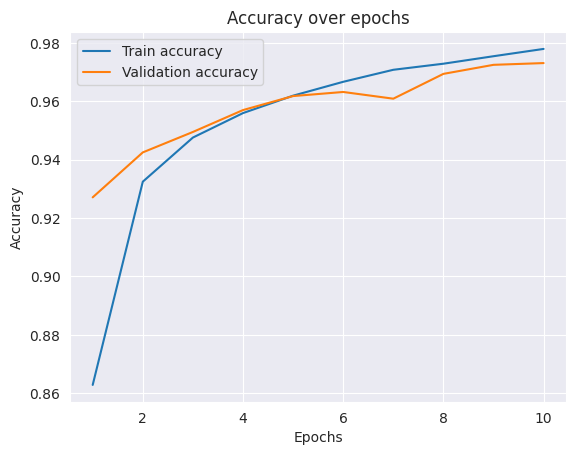

In [ ]:
fit_info = model.fit(x_train, y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     verbose=1,
                     validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

train_scores = fit_info.history['accuracy']
val_scores = fit_info.history['val_accuracy']

# Create the plot
fig, ax = plt.subplots()

sns.lineplot(x=np.arange(1, 11), y=train_scores, label='Train accuracy', ax=ax)
sns.lineplot(x=np.arange(1, 11), y=val_scores, label='Validation accuracy', ax=ax)

# Set labels and title
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy over epochs')

ax.legend()
plt.show()


As we can notice from the accuracy plot, after the 9th epoch the neural network starts to overfit. We can notice this behavior especially for the gradual slight decrease on validation accuracy.

#### 2.4 Update the model to implement a three-layer neural network where the hidden layers have 500 and 300 hidden units respectively. Train for 40 epochs. What is the best validation accuracy you can achieve? – Geoff Hinton (a co-pioneer of Deep learning) claimed this network could reach a validation accuracy of 0.9847 (http://yann.lecun.com/exdb/mnist/) using weight decay (L2 regularization of weights (kernels): https://keras.io/api/layers/regularizers/). Implement weight decay on hidden units and train and select 5 regularization factors from 0.000001 to 0.001. Train 3 replicates networks for each regularization factor. Plot the final validation accuracy with standard deviation (computed from the replicates) as a function of the regularization  factor. How close do you get to Hintons result? If you do not get the same results, what factors may influence this?

In [ ]:
def improved_nn(reg_factor=0, batch_size=128, learning_rate=0.1, show_score_plot=False):
  """
  Train a neural network with two hidden layers with 500 and 300 neurons respectively. Also add L2 regularization to the weights of the hidden layers.
  The function then returns the validation accuracy of the model.
  """

  model = Sequential()

  model.add(Flatten())
  model.add(Dense(500, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=reg_factor)))
  model.add(Dense(300, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=reg_factor)))
  model.add(Dense(num_classes, activation='softmax'))


  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=tensorflow.keras.optimizers.SGD(learning_rate=learning_rate),
                metrics=['accuracy'])

  fit_info = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=40,
                      verbose=0,
                      validation_data=(x_test, y_test))

  train_scores = fit_info.history['accuracy']
  val_scores = fit_info.history['val_accuracy']

  if show_score_plot:
    # Create the plot
    fig, ax = plt.subplots()

    sns.lineplot(x=np.arange(1, 41), y=train_scores, label='Train accuracy', ax=ax)
    sns.lineplot(x=np.arange(1, 41), y=val_scores, label='Validation accuracy', ax=ax)

    # Set labels and title
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy over epochs')

    ax.legend()
    plt.show()

  # return the validation accuracy
  return model.evaluate(x_test, y_test, verbose=0)[1]


In [ ]:
def avg_std_3nn_val_score(reg_factor):
  """
  Given a regularization factor, train 3 replicate neural networks with that regularization
  factor and return the average and standard deviation of the validation accuracy.
  """

  val_scores = ic([improved_nn(reg_factor) for _ in range(3)])


  return np.mean(val_scores), np.std(val_scores)

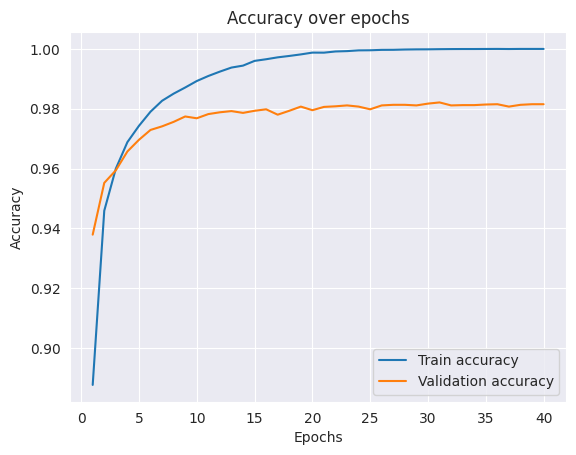

Validation accuracy of the improved neural network: 0.9815000295639038


In [ ]:
print(f'Validation accuracy of the improved neural network: {improved_nn(reg_factor=0.00001, show_score_plot=True)}')

As also shown in the accuracy scores plot, one of the best validation score (accuracy) reached with the updated neural network architecture is $0.9815$. This using the weight decay technique, applying the L2 regularization on the weight of the hidden units (regularization factor used: $0.00001$). Due to the randomness of optimization methods like Stochastic Gradient Descent (SGD), validation score results can vary a lot among the training experiments, usually in the range $\text{validation_score_range} ≈ [0.981, 0.984]$.

To experiment even further with weight decay, we will show through a plot the same model trained with 5 different values of the regularization factor. For each of these values, the neural network will be trained 3 times, showing the mean and standard deviation (how much the score varies across the 3 replicas) the obtained values through an errorbar.

In [ ]:
weight_decay_values = np.linspace(0.000001, 0.001, 5)

results = [avg_std_3nn_val_score(reg_factor) for reg_factor in weight_decay_values]

ic| [improved_nn(reg_factor) for _ in range(3)]: [0.9818999767303467, 0.9812999963760376, 0.9821000099182129]
ic| [improved_nn(reg_factor) for _ in range(3)]: [0.9811000227928162, 0.9829999804496765, 0.9815999865531921]
ic| [improved_nn(reg_factor) for _ in range(3)]: [0.9830999970436096, 0.9796000123023987, 0.9799000024795532]
ic| [improved_nn(reg_factor) for _ in range(3)]: [0.9818999767303467, 0.9815000295639038, 0.9811999797821045]
ic| [improved_nn(reg_factor) for _ in range(3)]: [0.9796000123023987, 0.9790999889373779, 0.9817000031471252]


In [ ]:
print('Replicas training results: ')
for i in range(0, len(weight_decay_values)):
  print(f'weight decay {i}: {weight_decay_values[i]}, score mean: {results[i][0]}, standard devation: {results[i][1]}')

Replicas training results: 
weight decay 0: 1e-06, score mean: 0.9817666610081991, standard devation: 0.0003399364923479793
weight decay 1: 0.00025075000000000005, score mean: 0.9818999965985616, standard devation: 0.0008041410717685096
weight decay 2: 0.0005005000000000001, score mean: 0.9808666706085205, standard devation: 0.001583942076139609
weight decay 3: 0.0007502500000000002, score mean: 0.9815333286921183, standard devation: 0.0002867409467817936
weight decay 4: 0.001, score mean: 0.9801333347956339, standard devation: 0.0011264525834272835


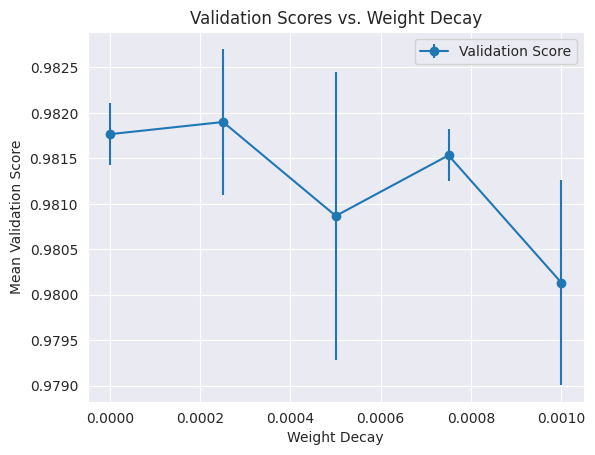

In [ ]:
# @title error-bar
means = [result[0] for result in results]
stds = [result[1] for result in results]

plt.errorbar(weight_decay_values, means, yerr=stds, marker='o', linestyle='-', label='Validation Score')
plt.xlabel('Weight Decay')
plt.ylabel('Mean Validation Score')
plt.title('Validation Scores vs. Weight Decay')
plt.legend()
plt.show()

Based on the resuts of the error bar above and several experiments, we can see a general decreasing trend of the validation accuracy by increasing the regularization factor. Another interesting insight is that, also due to the randomness of the optmizer used (Stochastic Gradient Descent) we can see a wide variation of the score for several L2 factors.

Referred to the scores achieved, instead, they can reach the Hinton but never overcome it. With the exeption of what the researcher stated about his neural network (the architecture, the use of weight decay regularization and the absence of specific image preprocessing), there could be many reasons and design choices behind this behavior:

- the **hyper-parameter values** (learning rate, batch sizes, weight decay, epochs);
- **dataset train/test split**, instead of an *eventual cross-validation*;
- **other dataset preprocessing**, apart from the essential one (pixel values normalization and one-hot encoding of the target labels) and the image transformation stated in the website (deskewed dataset);
- the **activation functions** used in the hidden layer, since some can be more suitable for specific tasks and in combination to other hyper-parameter values.


---

## Part 3: convolutional neural networks

#### 3.1: Design a model that makes use of at least one convolutional layer - how performant a model can you get? -- According to the MNIST database it should be possible reach to 99% accuracy on the validation data. If you choose to use any layers apart from the convolutional layers and layers that you used in previous questions, you must describe what they do. If you do not reach 99%  accuracy, report your best performance, and explain your attempts and thought process.

To try to achieve the 99% accuracy on the validation data, the model implemented followed the Convolutional Neural Network [LeNet-5 architecture](https://en.wikipedia.org/wiki/LeNet).

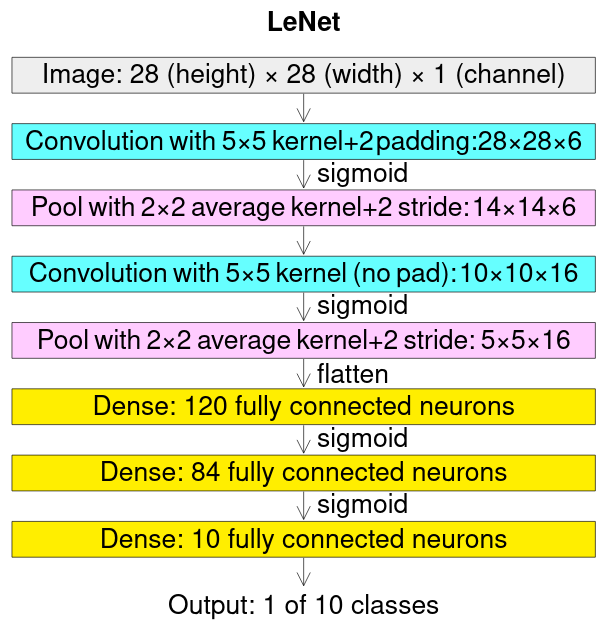

In order to follow the reference architecture and improve even further the whole model performance, 3 other layers type were used.

- **Zero Padding layer**: type of layer to add padding (extra rows/columns) to images with zeros before applying convolution. It helps in preserving the spatial dimensions of the input and prevents the output size from shrinking too quickly as we add more convolutional layers.

- **Average Pooling Layer**: A downsampling operation that reduces the spatial dimensions of the feature maps. It works by taking the average of a group of values from the feature map.

- **Dropout layer**: A regularization technique to prevent overfitting in neural networks. During training, dropout randomly "drops" (sets to zero) a fraction of the neurons in a layer, which prevents any single neuron from becoming too influential.

Moreover, always for performance reason, slight changes were made compared with the LeNet-5: the signmoid activation functions were replaced by the ReLU one, and for the fully connected layers were added L2 regularization factors to prevent first eventual overfitting problems. Finally, the Adam optimizer were adopted over Stochastic Gradient Descent, to reduce randomness in results and having a more gradual and adaptive change of the learning rate.

In [ ]:
def cnn(show_score_plot=False):
  """
  Train a convolutional neural network that try to replicate LeNet-5.
  The function then returns the validation accuracy of the model.
  """

  model = Sequential()

  # specify the amount of padding (2 pixels) for the first convolutional layer
  model.add(ZeroPadding2D(padding=(2, 2)))

  # first convolutional layer: 6 filters with 5x5 as kernel size. Input shape
  # corresponding to the dimension of the image, plus the only channel available
  model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))

  # pool layer for the first convolutional layer: (2, 2) pool size and +2 stride
  model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

  # second convolutional layer: 16 filters with 2x2 kernel size
  model.add(Conv2D(16, (5,5), activation="relu"))

  # pool layer for the second convolutional layer
  model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

  # input flattenning
  model.add(Flatten())

  # fully connected layers
  model.add(Dense(120, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=0.0001)))
  model.add(Dropout(0.5))

  model.add(Dense(84, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=0.0001)))
  # model.add(Dropout(0.3))

  # output layer
  model.add(Dense(num_classes, activation='softmax'))


  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

  fit_info = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=40,
                      verbose=0,
                      validation_data=(x_test, y_test))

  train_scores = fit_info.history['accuracy']
  val_scores = fit_info.history['val_accuracy']

  if show_score_plot:
    # Create the plot
    fig, ax = plt.subplots()

    sns.lineplot(x=np.arange(1, 41), y=train_scores, label='Train accuracy', ax=ax)
    sns.lineplot(x=np.arange(1, 41), y=val_scores, label='Validation accuracy', ax=ax)

    # Set labels and title
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy over epochs')

    ax.legend()
    plt.show()

  # return the validation accuracy
  return model.evaluate(x_test, y_test, verbose=0)[1]

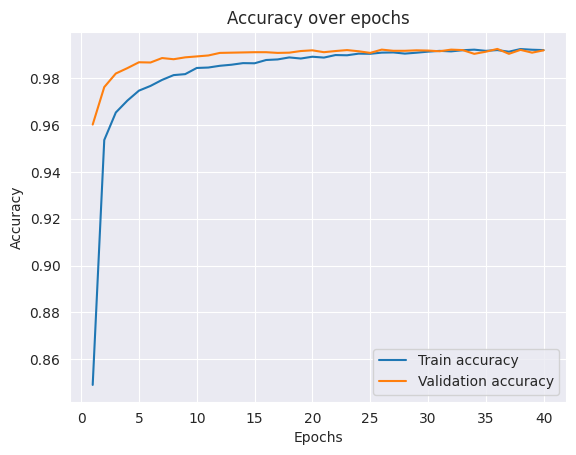

Validation accuracy of the a neural network with at least one convolutional layer: 0.9919000267982483


In [ ]:
print(f'Validation accuracy of the a neural network with at least one convolutional layer: {cnn(show_score_plot=True)}')

#### 3.2 Discuss the differences and potential benefits of using convolutional layers over fully connected ones for the application?

Among the differences between convolutional layers and the fully connected one, the main one are the following below, especially related on their efficiency and features are retained.

1. **Parameter Efficiency**. Convolutional Layers (Conv Layers) use a set of learnable filters that are applied across the input space. Because the same filter is used at every position of the input, the number of parameters is significantly reduced compared to Fully Connected Layers (FC Layers). In FC Layers, every neuron is connected to every neuron in the previous layer. This results in a large number of parameters, especially if the input dimensions are high. For instance, an FC layer connecting an input of size 1000x1000 to 1000 neurons would have $1000 \times 1000 \times 1000$ parameters. This makes convolutional networks much more parameter-efficient when dealing with large inputs.
2. **Feature Locality and Hierarchical Patterns**. Conv Layers are designed to recognize local patterns in the input data. The filters in these layers can detect features like edges, textures, and other patterns in small regions of the input. As you delve deeper into a convolutional network, these local patterns are combined to recognize more complex and abstract features. On the other hand, FC Layers don't take advantage of the spatial structure of the input data. Each neuron in an FC Layer treats input features independently, missing out on the hierarchical and spatial patterns that conv layers can effectively capture.
3. **Scalability to Larger Images**. Due to their parameter efficiency and weight-sharing mechanism, Conv Layers can adeptly handle larger input images without a significant increase in the number of parameters. In contrast, in FC Layers, the number of parameters grows exponentially as the size of the input expands.

These main differences between the 2 layers lead to the following benefit by using convolutional layers.

- **Better Generalization**: The translation invariance property helps convolutional networks generalize better to unseen data.
- **Efficient Training**: Fewer parameters often lead to faster training times.
- **Hierarchical Feature Learning**: Allows conv nets to automatically learn a hierarchy of features, which is especially useful for tasks like image classification.

In summary, convolutional layers offer specific advantages when dealing with spatial data like images. When it comes to learning efficiency, convolutional networks are significantly superior to fully connected ones since the parameters can be reused during the training. These are the reasons that  make CNN a preferred choice for many image and video processing tasks.